# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [140]:
import pandas as pd
import numpy as np
from datetime import datetime

def data_parser():
    df = pd.read_csv('players.csv')
    
    # Fill NaN values for draft info with 'Undrafted' and for birthPlace with 'Unknown'
    df['draft_pick'].fillna('Undrafted', inplace=True)
    df['draft_round'].fillna('Undrafted', inplace=True)
    df['draft_team'].fillna('Undrafted', inplace=True)
    df['draft_year'].fillna('Undrafted', inplace=True)
    df['birthPlace'].fillna('Unknown', inplace=True)
    # For numeric columns, fill NaN values with 0
    df.fillna(0, inplace=True)
    df.replace('', pd.NA, inplace=True)
    # Check for duplicates and remove them
    before_dedup = df.shape[0]
    df.drop_duplicates(inplace=True)
    after_dedup = df.shape[0]
    # Standardize Columns & convert height
    df['height'] = df['height'].apply(lambda x: convert_height(x))
    # Filter out players older than LeBron James
    lebron_birthdate = datetime.strptime('December 30, 1984', '%B %d, %Y')
    df['birthDate'] = pd.to_datetime(df['birthDate'], errors='coerce')
    df = df[df['birthDate'] > lebron_birthdate]
    # Save the cleaned DataFrame to a new CSV file
    df.to_csv('cleaned_players_filtered.csv', index=False)
    print(df.head())
    return df
def convert_height(height):
    # Convert height from format '6-10' to float representing feet (6 + 10/12)
    if isinstance(height, str) and '-' in height:
        feet, inches = height.split('-')
        return round(int(feet) + int(inches) / 12, 2)
    return height
############ Function Call ############
df_cleaned = data_parser()
print(df_cleaned.head())
print("Data cleaning completed.")

          _id  birthDate                birthPlace  career_AST career_FG%  \
9   abrinal01 1993-08-01  Palma de Mallorca, Spain         0.5       38.7   
14    acyqu01 1990-10-06              Tyler, Texas         0.6       44.4   
19  adamsja01 1996-05-04       Baltimore, Maryland         1.9       34.5   
20  adamsjo01 1994-07-08          Atlanta, Georgia         0.6       40.2   
22  adamsst01 1993-07-20      Rotorua, New Zealand         1.0       58.8   

   career_FG3% career_FT%  career_G career_PER  career_PTS career_TRB  \
9         36.8       88.0       174        8.8         5.3        1.4   
14        35.0       75.9       337       11.2         4.9        3.5   
19        33.8       77.8        34        7.6         3.2        1.8   
20        38.5       60.7        32       13.1         3.2        0.9   
22         0.0       55.3       467       16.7         9.7        7.4   

   career_WS career_eFG%                                college    draft_pick  \
9        5.0     

/var/folders/_z/n9ykk0g17hv4xxnrd8qxg3th0000gn/T/ipykernel_45414/793569318.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['draft_pick'].fillna('Undrafted', inplace=True)
/var/folders/_z/n9ykk0g17hv4xxnrd8qxg3th0000gn/T/ipykernel_45414/793569318.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

## Web Collection Requirement \#1


In [139]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def web_parser1():
    pd.set_option('display.max_rows', 30)
    url = 'https://hoopshype.com/salaries/players/2023-2024/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table')
    df = pd.read_html(str(table))[0]
    # Drop the column for 2023/24 salaries if it exists
    if '2023/24(*)' in df.columns:
        df = df.drop(columns=['2023/24(*)'])
    # Remove the first column (index) and set df index to start from 1
    df = df.iloc[:, 1:]
    df.index += 1

    # Handle empty strings by replacing them with NaN and then remove them
    df.replace('', pd.NA, inplace=True)
    df.dropna(inplace=True)

    # Convert salary values to numeric
    df['2023/24'] = df['2023/24'].replace('[\$,]', '', regex=True).astype(float)
    
    # Average out the salaries for duplicate entries
    df = df.groupby('Player', as_index=False).agg({'2023/24': 'mean'})
    
    # Save to CSV
    df.to_csv('nba_player_salaries.csv', index=False)
    
    # Print the cleaned DataFrame
    print(df)
    return df

############ Function Call ############
web_parser1()

              Player     2023/24
0           AJ Green   1901769.0
1         AJ Griffin   3712920.0
2          AJ Lawson   1000000.0
3       Aaron Gordon  21266182.0
4      Aaron Holiday   2346614.0
..               ...         ...
607   Zavier Simpson    207100.0
608       Zeke Nnaji   4306281.0
609     Zhaire Smith    116075.0
610  Ziaire Williams   4810200.0
611  Zion Williamson  34005250.0

[612 rows x 2 columns]


/var/folders/_z/n9ykk0g17hv4xxnrd8qxg3th0000gn/T/ipykernel_45414/1522059961.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,Player,2023/24
0,AJ Green,1901769.0
1,AJ Griffin,3712920.0
2,AJ Lawson,1000000.0
3,Aaron Gordon,21266182.0
4,Aaron Holiday,2346614.0
...,...,...
607,Zavier Simpson,207100.0
608,Zeke Nnaji,4306281.0
609,Zhaire Smith,116075.0
610,Ziaire Williams,4810200.0


## Web Collection Requirement #2

In [137]:
# from urllib.request import urlopen
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
# Function to get team game stats by season for a given team ID
api_key = '1a293c72575d4565b863db93ce85c75f' ## obtained through registering for free trial, only grants access to 2024 season
def web_parser2(team_id, api_key):
    url = f"https://api.sportsdata.io/v3/nba/scores/json/TeamGameStatsBySeason/2024/{team_id}/all?key={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error: Received status code {response.status_code} for team ID {team_id}")
        return []

all_teams_data = []
# Loop through team IDs from 1 to 30 (theres 30 nba teams that data has been collected on)
for team_id in range(1, 31):
    team_data = web_parser2(team_id, api_key)
    if team_data:
        team_data_df = pd.DataFrame(team_data)
        # Drop rows with null values in specific critical columns, for example 'GameID' and 'DateTime'
        team_data_df = team_data_df.dropna(subset=['GameID', 'DateTime'])
        # Calculate average stats per game
        stats_columns = [
            'FantasyPoints', 'Minutes', 'Seconds', 'FieldGoalsMade', 'FieldGoalsAttempted', 'FieldGoalsPercentage',
            'EffectiveFieldGoalsPercentage', 'TwoPointersMade', 'TwoPointersAttempted', 'TwoPointersPercentage',
            'ThreePointersMade', 'ThreePointersAttempted', 'ThreePointersPercentage', 'FreeThrowsMade',
            'FreeThrowsAttempted', 'FreeThrowsPercentage', 'OffensiveRebounds', 'DefensiveRebounds', 'Rebounds',
            'OffensiveReboundsPercentage', 'DefensiveReboundsPercentage', 'TotalReboundsPercentage', 'Assists', 'Steals',
            'BlockedShots', 'Turnovers', 'PersonalFouls', 'Points', 'TrueShootingAttempts', 'TrueShootingPercentage',
            'PlayerEfficiencyRating', 'AssistsPercentage', 'StealsPercentage', 'BlocksPercentage', 'TurnOversPercentage',
            'UsageRatePercentage', 'FantasyPointsFanDuel', 'FantasyPointsDraftKings', 'FantasyPointsYahoo', 'PlusMinus',
            'DoubleDoubles', 'TripleDoubles', 'FantasyPointsFantasyDraft'
        ]
        # Convert relevant columns to numeric to ensure proper calculation and rounding
        team_data_df[stats_columns] = team_data_df[stats_columns].apply(pd.to_numeric, errors='coerce')
        # Calculate mean and round to 2 decimal places
        average_stats_df = team_data_df[stats_columns].mean().round(2)
        # Combine with non-numeric data that should not be averaged
        non_numeric_data = team_data_df[['TeamID', 'SeasonType', 'Season', 'Name', 'Team']].iloc[0]
        result_df = pd.concat([non_numeric_data, average_stats_df], axis=0).to_frame().T
        all_teams_data.append(result_df)
# Concatenate all team data into a single DataFrame
all_teams_df = pd.concat(all_teams_data, ignore_index=True)
# Output the combined data to a CSV file
all_teams_df.to_csv('nba_team_game_stats_2024_all_teams_averaged.csv', index=False)
print("Data has been saved to nba_team_game_stats_2024_all_teams_averaged.csv")

# Print the resulting DataFrame for inspection
print(all_teams_df)



Data has been saved to nba_team_game_stats_2024_all_teams_averaged.csv
   TeamID SeasonType Season                    Name Team FantasyPoints  \
0       1          1   2024      Washington Wizards  WAS        257.38   
1       2          1   2024       Charlotte Hornets  CHA         93.27   
2       3          1   2024           Atlanta Hawks  ATL         120.0   
3       4          1   2024              Miami Heat  MIA         74.22   
4       5          1   2024           Orlando Magic  ORL         90.77   
5       6          1   2024         New York Knicks   NY        258.18   
6       7          1   2024      Philadelphia 76ers  PHI        283.05   
7       8          1   2024           Brooklyn Nets  BKN        233.75   
8       9          1   2024          Boston Celtics  BOS        271.88   
9      10          1   2024         Toronto Raptors  TOR        101.47   
10     11          1   2024           Chicago Bulls  CHI        313.14   
11     12          1   2024     Cleveland

In [135]:
def extra_source1():
    r = requests.get(
        'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2023-24&SeasonType=Regular+Season&StatCategory=FG3M'
    ).json()
    # can be edited to filter the output, columns_to_include = ['PLAYER', 'FG_PCT', 'PTS', 'FGM', 'AST', 'STL', 'BLK', 'TOV']
    headers = r['resultSet']['headers']
    # Create DataFrame with all columns
    df = pd.DataFrame(r['resultSet']['rowSet'], columns=headers)
    # df = df[columns_to_include] would also be included to filter 
    # Save to CSV
    df.to_csv('output.csv', index=False)
    # Print DataFrame
    print(df)
# Function call
extra_source1()
    
############ Function Call ############
extra_source1()

     PLAYER_ID  RANK             PLAYER     TEAM_ID TEAM  GP   MIN  FGM   FGA  \
0       201939     1      Stephen Curry  1610612744  GSW  74  2422  650  1445   
1      1629029     2        Luka Doncic  1610612742  DAL  70  2624  804  1652   
2      1628978     3   Donte DiVincenzo  1610612752  NYK  81  2360  445  1004   
3       202691     4      Klay Thompson  1610612744  GSW  77  2284  490  1133   
4       202331     5        Paul George  1610612746  LAC  74  2502  582  1236   
..         ...   ...                ...         ...  ...  ..   ...  ...   ...   
567     202684   498   Tristan Thompson  1610612739  CLE  49   549   73   120   
568    1629660   498          Ty Jerome  1610612739  CLE   2    15    2     4   
569    1628962   498     Udoka Azubuike  1610612756  PHX  16   113   16    23   
570    1630586   498       Usman Garuba  1610612744  GSW   6    18    1     6   
571    1631111   498  Wendell Moore Jr.  1610612750  MIN  25    75    9    18   

     FG_PCT  FG3M  FG3A  FG

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. This downloaded csv file had a number of inconsistencies that had to be handled. These included null values for draft picks, teams, year, and round for players that went undrafted, blank values for birth places and dates from individuals that don't have access to their birth certificates. In order to account for this, players with these null values were classified as undrafted in those sections to avoid future errors, and players that didn't have birth data had their null values replaced with an Unknown identifier.

2. For wev collection #1, there were possible null values in the tables of the salaries which would cause issues when the data is later manipulated. In order to account for this and avoid these issues the rows that contained null values are dropped from the df to avoid complications. There were also possible duplicates which would cause similar complications with a few of the players having salaries from different contracts, and these players were handled by averaging out their earnings 

3. A few items could be null or empty in the response from the request, but the most important and possibly damaging ones come from the GameID and Date-time, which could cause a number of errors down the line if not accounted for. To resolve this, rows that contain null gameID,s and dateTime (meaning the game was not actually played) are dropped from the database to resolve these issues.

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source:
*   Web Collection #1 Source:
*   Web Collection #2 Source:



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [118]:
def insight1():
     # Load the cleaned player data and salary data
    players_df = pd.read_csv('cleaned_players.csv')
    salaries_df = pd.read_csv('nba_player_salaries.csv')
    
    # Clean the salary column by removing '$' and ',' and converting to numeric and only account for the player's main position
    salaries_df['2023/24'] = salaries_df['2023/24'].replace('[\$,]', '', regex=True).astype(float)
    players_df['position'] = players_df['position'].apply(lambda x: x.split(" and")[0])
    
    # Merge the datasets on the player name
    merged_df = pd.merge(players_df, salaries_df, left_on='name', right_on='Player', how='inner')
    
    # Calculate average salary by position and round to 2 decimals
    avg_salary_by_position = merged_df.groupby('position')['2023/24'].mean().round(2).sort_values(ascending=False)
    
    # Convert to list of tuples and sort in descending order
    avg_salary_by_position_list = list(avg_salary_by_position.items())
    
    # Print and display the list
    print(avg_salary_by_position_list)
    print(str(avg_salary_by_position_list[0][0]) + " is the highest paid position on average! WHo could've guessed?!?!?! :)")

    return avg_salary_by_position_list

############ Function Call ############
avg_salary_by_position_df = insight1()

[('Shooting Guard', 16675242.98), ('Point Guard', 16520342.22), ('Center', 14747145.41), ('Small Forward', 13875854.77), ('Power Forward', 13292646.36)]
Shooting Guard is the highest paid position on average! WHo could've guessed?!?!?! :)


### Insight 1 Explanation

This insight is into the relationship between a player's position and their salaries. It returns a descending list of the positions and their corresponding average salaries. in was calculated from related data found in avg_salary_by_position. This could be useful data for a GM or someone looking to get into that field of constructing rosters, and it is an interesting fact for any nba fan. This disparity in average salaries could be explained by basketball heading towards a higher paced, increased transition scoring game with an emphasis on shooting that benefits the shooting and point guard positions. The game is also moving away from post play, which harms the larger positions such as a power forward.

In [44]:
def insight2():
    players_df = pd.read_csv('cleaned_players.csv')
    turnovers_df = pd.read_csv('output.csv')
    # Exclude players who use both hands or have unlisted shooting hands
    players_df = players_df[players_df['shoots'].isin(['Right', 'Left'])]
    # Merge the datasets on the player name (assuming 'name' in players_df and 'PLAYER' in turnovers_df)
    merged_df = pd.merge(players_df, turnovers_df, left_on='name', right_on='PLAYER', how='inner')
    # Convert relevant columns to numeric, handling non-numeric entries
    merged_df['career_FG3%'] = pd.to_numeric(merged_df['career_FG3%'], errors='coerce')
    merged_df['career_FG%'] = pd.to_numeric(merged_df['career_FG%'], errors='coerce')
    merged_df['career_PTS'] = pd.to_numeric(merged_df['career_PTS'], errors='coerce')
    merged_df['career_AST'] = pd.to_numeric(merged_df['career_AST'], errors='coerce')
    merged_df["AST"] = pd.to_numeric(merged_df['AST'], errors='coerce')
    merged_df['TOV'] = pd.to_numeric(merged_df['TOV'], errors='coerce')
    # Calculate assist to turnover ratio, handle division by zero
    merged_df['AST_TOV_ratio'] = (merged_df['AST'] / merged_df['TOV']).replace([float('inf'), -float('inf')], 0).round(2)

    # Group by 'shoots' to calculate average statistics for right- and left-handed players
    shooting_hand_stats = merged_df.groupby('shoots')[['career_FG3%', 'career_FG%', 'career_PTS', 'career_AST', 'AST_TOV_ratio']].mean().round(2)
    return shooting_hand_stats

############ Function Call ############
shooting_hand_stats = insight2()
shooting_hand_stats

,career_FG3%,career_FG%,career_PTS,career_AST,AST_TOV_ratio
shoots,,,,,
Left,29.73,46.36,10.80,2.80,2.19
Right,31.62,45.94,10.69,2.24,2.28


### Insight 2 Explanation

This data is formatted and calculated to represent the career 3 point shooting percentage, career field goal percentage, career Pts average, career assist average, and career assist to turnover ratio of players, separated by their classification of their dominant hand. This was one insight I was very interested in performing to see if there would be a difference in efficiency and play styles based on hand dominance. I had previously figured that this could be the case due to defenses playing differently against left handed players due to less time played against them, because of them being less common than right handed players. The data however does not support this, as although there are minor differences between the players' stats in relation to their dominant hands, they don't waver enough to support an argument that this is a contributing factor in these stats. This is interesting information for any NBA fan, and has likely been a question in their minds at one point in time, and it is good to have gotten the chance to answer it through this insight.

In [56]:
def insight3():
    players_df = pd.read_csv('cleaned_players.csv')
    salaries_df = pd.read_csv('nba_player_salaries.csv')
    
    # Remove dollar signs and commas from the salary column and convert to numeric
    salaries_df['2023/24'] = salaries_df['2023/24'].replace('[\$,]', '', regex=True).astype(float)
    # Merge the datasets on the player nam
    merged_df = pd.merge(players_df, salaries_df, left_on='name', right_on='Player', how='inner')
    
    # Convert relevant columns to numeric, handling non-numeric entries
    merged_df['career_WS'] = pd.to_numeric(merged_df['career_WS'], errors='coerce')
    
    # create new df from merged to include salary and Win Shares
    comparison_df = merged_df[['name', '2023/24', 'career_WS']].dropna()
    # Calculate the correlation coefficient
    correlation = comparison_df['2023/24'].corr(comparison_df['career_WS'])
    print("The correlation coefficient between salary and career Win Shares is:", correlation)

    return comparison_df

############ Function Call ############
correlation = insight3()

The correlation coefficient between salary and career Win Shares is: 0.3924630757649495


### Insight 3 Explanation

This insight is meant to inspect and convey the correlation between a player's salary and their impact on winning basketball. The conclusion came out to be a correlation coefficient with a value of around 0.392, which relates to a medium positive correlation. This is a useful metric because, although the correlation does not entirely imply causation, there is a reasonable trend to believe that a player with a higher salary value is usually more impactful on winning basketball, justifying the extra contract money spent on them. This information could be useful to any NBA fan, or someone that is looking into team construction.

In [171]:
import pandas as pd
import pandas as pd
import random

def insight4():

    # Load the CSV files

    salaries_df = pd.read_csv('nba_player_salaries.csv')
    team_stats_df = pd.read_csv('nba_team_game_stats_2024_all_teams_averaged.csv')
    players_df = pd.read_csv('cleaned_players_filtered.csv')

    # Ensure player names are consistent across DataFrames
    players_df['name'] = players_df['name'].str.strip()
    salaries_df['Player'] = salaries_df['Player'].str.strip()

    # Create a dummy team list
    teams = team_stats_df['Team'].unique()
    players_df['Team'] = [random.choice(teams) for _ in range(len(players_df))]

    # Merge salary data with player data to get team information
    player_salaries = pd.merge(players_df, salaries_df, left_on='name', right_on='Player', how='inner')

    # Calculate total team salary
    total_team_salary = player_salaries.groupby('Team')['2023/24'].sum().reset_index()
    total_team_salary.columns = ['Team', 'TotalSalary']

    # Merge with team performance data
    team_stats_df['Team'] = team_stats_df['Team'].str.strip()
    team_performance_salary = pd.merge(team_stats_df, total_team_salary, left_on='Team', right_on='Team', how='inner')

    # Calculate cost efficiency (total salary divided by number of wins)
    team_performance_salary['CostEfficiency'] = team_performance_salary['TotalSalary'] / team_performance_salary['FantasyPoints']

    # Round relevant columns to two decimal places
    team_performance_salary['TotalSalary'] = team_performance_salary['TotalSalary'].round(2)
    team_performance_salary['CostEfficiency'] = team_performance_salary['CostEfficiency'].round(2)

    # Rank teams by cost efficiency
    team_performance_salary = team_performance_salary.sort_values(by='CostEfficiency')

    # Select relevant columns for display
    cost_efficiency_df = team_performance_salary[['Team', 'FantasyPoints', 'TotalSalary', 'CostEfficiency']]

    # Select relevant columns for display
    print(cost_efficiency_df.to_string(index=False))

############ Function Call ############
insight4()

Team  FantasyPoints  TotalSalary  CostEfficiency
 OKC         381.74   18381148.0        48150.96
  NY         258.18   19448609.0        75329.65
 HOU         368.76   54465259.0       147698.39
 MIN         229.71   51737862.0       225231.21
 DEN         387.33   94050061.0       242816.36
 MIL         342.18   83531321.0       244115.15
 MEM         249.67   70802798.0       283585.52
  GS         294.90   88205451.0       299102.92
  SA         282.76   97017977.0       343110.68
 CHI         313.14  141917721.0       453208.54
  NO         142.14   65650620.0       461872.94
 WAS         257.38  131329783.0       510256.36
 PHO         207.35  120693710.0       582077.21
 DET         211.69  130701498.0       617419.33
 BOS         271.88  183462127.0       674790.82
 DAL          62.99   44153753.0       700964.49
 ATL         120.00   90358187.0       752984.89
 TOR         101.47   76480536.0       753725.59
 PHI         283.05  215248938.0       760462.60
 UTA         120.95 

### Insight 4 Explanation

This insight is meant to compare the cost effectiveness of each team, through summing up their total fantasy points. The lower value for cost efficiency the better. The results state that the OKC thunder have the best cost efficiency, likely due to the large number of young players. The results also show that the LA Lakers have the worst cost efficiency, likely due to their 2 max contract players in Lebron and AD. This code would be useful for a team's GM evaluating the effectiveness of their season.

In [148]:
import pandas as pd

def insight5():
    df1 = pd.read_csv('cleaned_players_filtered.csv')
    df2 = pd.read_csv('output.csv')

    # Merge the DataFrames on the player's name
    merged_df = pd.merge(df1, df2, left_on='name', right_on='PLAYER', how='inner')
  
    # Convert necessary columns to numeric
    merged_df['height'] = pd.to_numeric(merged_df['height'], errors='coerce')
    merged_df['weight'] = pd.to_numeric(merged_df['weight'].str.replace('lb', ''), errors='coerce')
    merged_df['career_FG%'] = pd.to_numeric(merged_df['career_FG%'], errors='coerce')
    merged_df['career_FG3%'] = pd.to_numeric(merged_df['career_FG3%'], errors='coerce')

    # Calculate correlations
    height_fg_correlation = merged_df['height'].corr(merged_df['career_FG%'])
    height_fg3_correlation = merged_df['height'].corr(merged_df['career_FG3%'])
    weight_fg_correlation = merged_df['weight'].corr(merged_df['career_FG%'])
    weight_fg3_correlation = merged_df['weight'].corr(merged_df['career_FG3%'])

    # Create a DataFrame with the correlation results
    correlation_df = pd.DataFrame({
        'Metric': ['Height', 'Weight'],
        'Field Goal %': [round(height_fg_correlation, 3), round(weight_fg_correlation, 3)],
        'Three-Point %': [round(height_fg3_correlation, 3), round(weight_fg3_correlation, 3)]
    })

    return correlation_df
############ Function Call ############
correlation_df = insight5()
print(correlation_df)

   Metric  Field Goal %  Three-Point %
0  Height         0.514         -0.315
1  Weight         0.525         -0.291


### Insight 5 Explanation

The goal of this insight from the data was to correlate the height, and weight of a player to their field goal percentage and their 3 point percentage. Naturally, one would assume that their field goal percentage would correlate with their heigh and weight, as it would be easier to put the ball in the hoop if you were closer and bigger, and its harder to contest larger players, but one would also assume that because they are harder to contest it would lead to them having higher 3 point percentages as well. However, based on the results, being correlation coefficients of around 0.514 and -0.315 for height, and .525 and -0.291 for weight respectively, it seems that there is a medium to strong positive correlation between heights and field goal percentages, and a small to medium negative correlation between height and 3 point percentages. This would make more sense, because there should be a more obvious correlation between being bigger and having an easier time putting the ball in the basket in general, but there are no glaring reasons, besides a lack of necessity, that size should be detrimental to a player's 3 point shooting ability. This information would be useful to a fan of the game in general, and someone looking to bet on a players stats for an NBA game as they would be more likely to bet on the efficiency of a larger player.

## Data Visualizations

[('Shooting Guard', 16675242.98), ('Point Guard', 16520342.22), ('Center', 14747145.41), ('Small Forward', 13875854.77), ('Power Forward', 13292646.36)]
Shooting Guard is the highest paid position on average! WHo could've guessed?!?!?! :)


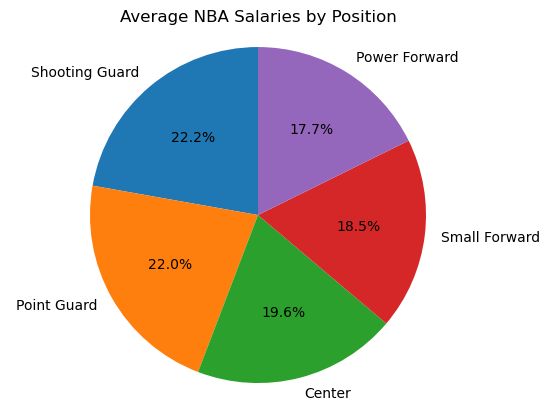

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
def visual1():
    # Create a pie chart
    avg_salary_by_position_list = insight1()
    position_counts = {item[0]: item[1] for item in avg_salary_by_position_list}
    
    fig, ax = plt.subplots()
    ax.pie(position_counts.values(), labels=position_counts.keys(), autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # makes it a circle.
    
    plt.title('Average NBA Salaries by Position')
    plt.show()

############ Function Call ############
visual1()

### Visualization 1 Explanation

Insert explanation here

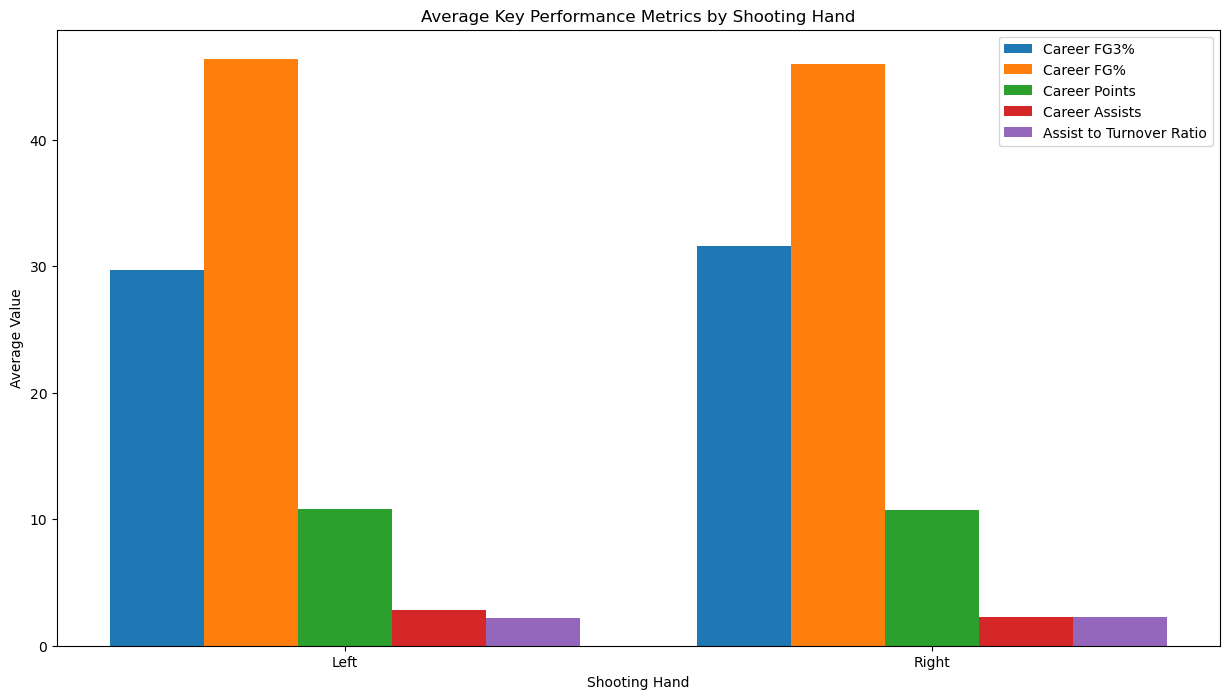

In [46]:
def visual2(shooting_hand_stats):
    key_metrics = ['career_FG3%', 'career_FG%', 'career_PTS', 'career_AST', 'AST_TOV_ratio']
    metric_names = {
        'career_FG3%': 'Career FG3%',
        'career_FG%': 'Career FG%',
        'career_PTS': 'Career Points',
        'career_AST': 'Career Assists',
        'AST_TOV_ratio': 'Assist to Turnover Ratio'
    }
    
    positions = shooting_hand_stats.index
    n_positions = len(positions)
    n_metrics = len(key_metrics)
    
    fig, ax = plt.subplots(figsize=(15, 8))
    width = 0.8 / n_metrics
    x_indices = np.arange(n_positions)
    
    for index, metric in enumerate(key_metrics):
        ax.bar(x_indices + width * index, shooting_hand_stats[metric], width=width, label=metric_names[metric])
    
    ax.set_title('Average Key Performance Metrics by Shooting Hand')
    ax.set_xlabel('Shooting Hand')
    ax.set_ylabel('Average Value')
    ax.set_xticks(x_indices + width * n_metrics / 2 - width / 2)
    ax.set_xticklabels(positions)
    ax.legend()
    plt.show()

############ Function Call ############
visual2(shooting_hand_stats)

### Visualization 2 Explanation

Insert explanation here

The correlation coefficient between salary and career Win Shares is: 0.3924630757649495


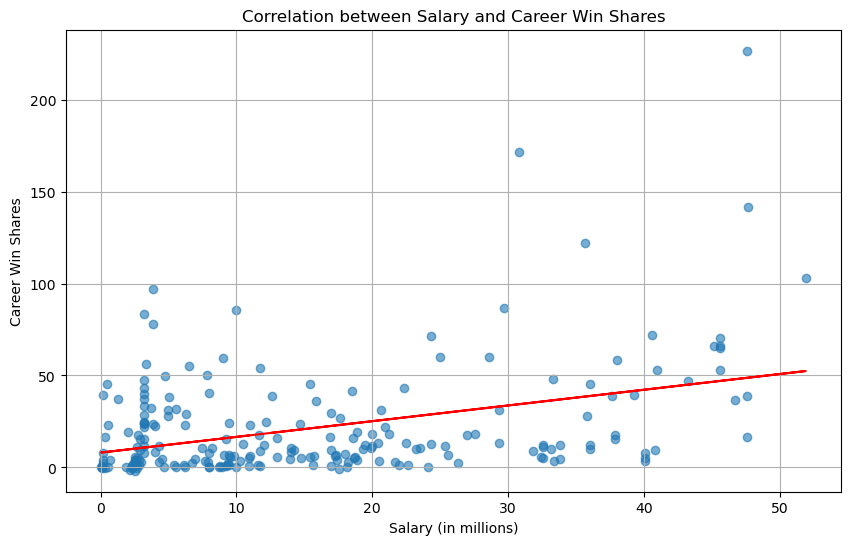

In [123]:
import matplotlib.pyplot as plt
def visual3():
    comparison_df = insight3()
    plt.figure(figsize=(10, 6))
    x = comparison_df['2023/24'] / 1e6  # Salary in millions
    y = comparison_df['career_WS']
    plt.scatter(x, y, alpha=0.6)
    
    # Add trend line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), color='red')
    
    plt.title('Correlation between Salary and Career Win Shares')
    plt.xlabel('Salary (in millions)')
    plt.ylabel('Career Win Shares')
    plt.grid(True)
    plt.show()
    
############ Function Call ############
visual3()

### Visualization 3 Explanation

This visual is meant to represent a trend line and scattered representation of the individual players. The axis are based on the players' salary in millions and career win shares, which is meant to represent their impact on winning basketball. This scatter plot effectively shows the positive relationship trend between these 2 factors

## Summary Files

In [172]:
def summary1():
     # Load the CSV files
    players_file = 'cleaned_players_filtered.csv'
    salaries_file = 'nba_player_salaries.csv'
    team_stats_file = 'nba_team_game_stats_2024_all_teams_averaged.csv'
    output_file = 'output.csv'

    players_df = pd.read_csv(players_file)
    salaries_df = pd.read_csv(salaries_file)
    team_stats_df = pd.read_csv(team_stats_file)
    output_df = pd.read_csv(output_file)

    # Merge player data with salaries
    player_salaries = pd.merge(players_df, salaries_df, left_on='name', right_on='Player', how='left')

    # Merge with output data
    player_salaries_output = pd.merge(player_salaries, output_df, left_on='name', right_on='PLAYER', how='left')

    # Ensure 'Team' column is present for the merge
    if 'Team' not in players_df.columns:
        import random
        teams = team_stats_df['Team'].unique()
        player_salaries_output['Team'] = [random.choice(teams) for _ in range(len(player_salaries_output))]

    # Merge with team stats data
    summary_df = pd.merge(player_salaries_output, team_stats_df, left_on='Team', right_on='Team', how='left')

    # Drop overlapping and irrelevant columns
    summary_df = summary_df.drop(columns=['Player', 'PLAYER'])

    # Save the resulting DataFrame to summary.csv
    summary_df.to_csv('summary.csv', index=False)

############ Function Call ############
summary1()

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


[*   Video Presentation Link](https://youtu.be/h8x7DyoT0b4)


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
